Ejercicio 1: Comprar Vivienda

Integrantes: Sonia Jovel, Julian David Ramirez, Christian Fabian Lasso

In [3]:
### Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
### Abrimos el archivo: comprar_vivienda.csv y explore las columnas
df = pd.read_csv("comprar_vivienda.csv", delimiter=";")
df

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil
0,6000,1000,0,600,50000,400000,0
1,6745,944,123,429,43240,636897,1
2,6455,1033,98,795,57463,321779,2
3,7098,1278,15,254,54506,660933,0
4,6167,863,223,520,41512,348932,0
...,...,...,...,...,...,...,...
197,3831,690,352,488,10723,363120,0
198,3961,1030,270,475,21880,280421,2
199,3184,955,276,684,35565,388025,1
200,3334,867,369,652,19985,376892,1


Diccionario de Datos para comprar_vivienda.csv
ingresos:

Tipo de Dato: int
Descripción: Ingreso mensual
gastos_comunes:

Tipo de Dato: int
Descripción: Gastos comunes
pago_coche:

Tipo de Dato: int
Descripción: Pago mensual del coche
gastos_otros:

Tipo de Dato: int
Descripción: Otros gastos
ahorros:

Tipo de Dato: int
Descripción: Ahorros acumulados
vivienda:

Tipo de Dato: int
Descripción: Valor de la vivienda
estado_civil:

Tipo de Dato: int
Descripción: Estado civil (0: Soltero, 1: Casado, 2: Divorciado)

In [5]:
### Mostramos la información general del DataFrame
print("Información general del DataFrame:")
print(df.info())

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ingresos        202 non-null    int64
 1   gastos_comunes  202 non-null    int64
 2   pago_coche      202 non-null    int64
 3   gastos_otros    202 non-null    int64
 4   ahorros         202 non-null    int64
 5   vivienda        202 non-null    int64
 6   estado_civil    202 non-null    int64
dtypes: int64(7)
memory usage: 11.2 KB
None


In [6]:
### Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())


Estadísticas descriptivas:
          ingresos  gastos_comunes  pago_coche  gastos_otros       ahorros  \
count   202.000000      202.000000  202.000000    202.000000    202.000000   
mean   4958.995050      971.584158  211.742574    515.425743  38749.668317   
std    1682.862556      272.106351  124.940754    168.103075  17365.231870   
min    2008.000000      384.000000    0.000000    201.000000  10319.000000   
25%    3513.750000      766.750000   99.000000    383.250000  24964.250000   
50%    4947.500000      968.000000  208.500000    522.500000  38523.000000   
75%    6374.500000     1165.250000  318.750000    656.750000  52150.750000   
max    7984.000000     1585.000000  448.000000    828.000000  69934.000000   

            vivienda  estado_civil  
count     202.000000    202.000000  
mean   373349.638614      1.024752  
std    136371.525622      0.837184  
min    176553.000000      0.000000  
25%    274810.000000      0.000000  
50%    340783.500000      1.000000  
75%    444

In [7]:
### Mostramos las 5 primeras filas
df.head()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil
0,6000,1000,0,600,50000,400000,0
1,6745,944,123,429,43240,636897,1
2,6455,1033,98,795,57463,321779,2
3,7098,1278,15,254,54506,660933,0
4,6167,863,223,520,41512,348932,0


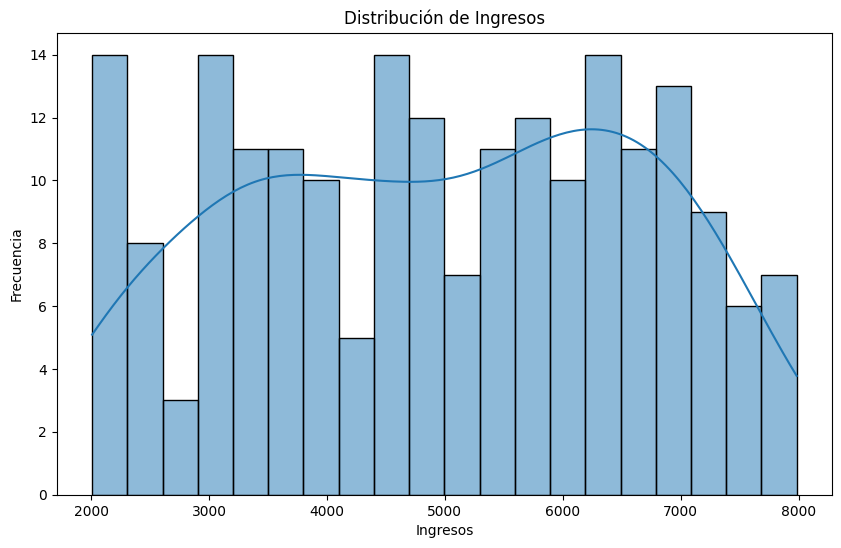

In [8]:
### Visualizamos la distribución de ingresos
plt.figure(figsize=(10, 6))
sns.histplot(df['ingresos'], bins=20, kde=True)
plt.title('Distribución de Ingresos')
plt.xlabel('Ingresos')
plt.ylabel('Frecuencia')
plt.show()

In [18]:
### Crear una columna denominada total_gastos que contiene la sumatoria de gastos_comunes, pago_coche y gastos_otros
df['total_gastos'] = df['gastos_comunes'] + df['pago_coche'] + df['gastos_otros']

### Crear una columna en el DataFrame denominada total_efectivo que resta los ingresos del total_gastos
df['total_efectivo'] = df['ingresos'] - df['total_gastos']

### Crear una columna en el DataFrame denominada saldo_disponible que suma la columna total_efectivo y ahorros
df['saldo_disponible'] = df['total_efectivo'] + df['ahorros']

### Tomar el valor de la vivienda y restar el saldo_disponible, guardar estos registros en una columna nueva denominada dinero_solicitar_banco
df['dinero_solicitar_banco'] = df['vivienda'] - df['saldo_disponible']

### Crear la columna estado_civil_texto con base a los valores de la columna estado_civil
estado_civil_dict = {0: 'soltero', 1: 'casado', 2: 'divorciado'}
df['estado_civil_texto'] = df['estado_civil'].map(estado_civil_dict)

### Mostrar el DataFrame resultante
print(df)

     ingresos  gastos_comunes  pago_coche  gastos_otros  ahorros  vivienda  \
0        6000            1000           0           600    50000    400000   
1        6745             944         123           429    43240    636897   
2        6455            1033          98           795    57463    321779   
3        7098            1278          15           254    54506    660933   
4        6167             863         223           520    41512    348932   
..        ...             ...         ...           ...      ...       ...   
197      3831             690         352           488    10723    363120   
198      3961            1030         270           475    21880    280421   
199      3184             955         276           684    35565    388025   
200      3334             867         369           652    19985    376892   
201      3988            1157         105           382    11980    257580   

     estado_civil  total_gastos  total_efectivo  saldo_disponib

In [19]:
### Definir la regla para generar el crédito
regla_credito = (data['gastos_comunes'] < 1000) & (data['ahorros'] > 50000)

### Aplicar la regla al DataFrame y guardar los registros en un nuevo DataFrame llamado data_credito
data_credito = data[regla_credito]

### Mostrar el DataFrame resultante
print(data_credito)

     ingresos  gastos_comunes  pago_coche  gastos_otros  ahorros  vivienda  \
5        5692             911          11           325    50875    360863   
12       5663             793         121           225    67971    524971   
13       6139             921         210           387    65438    333239   
15       5749             690         291           698    50257    305122   
16       5685             910         182           271    66947    365809   
17       6722             807          52           779    66020    593711   
19       6038             966          53           270    69636    286581   
20       6840             889         127           263    50080    455906   
21       6519             782         274           232    69934    569270   
32       5163             620          99           696    64331    669540   
38       6025             964         187           567    63892    302117   
41       6044             967         239           615    66145

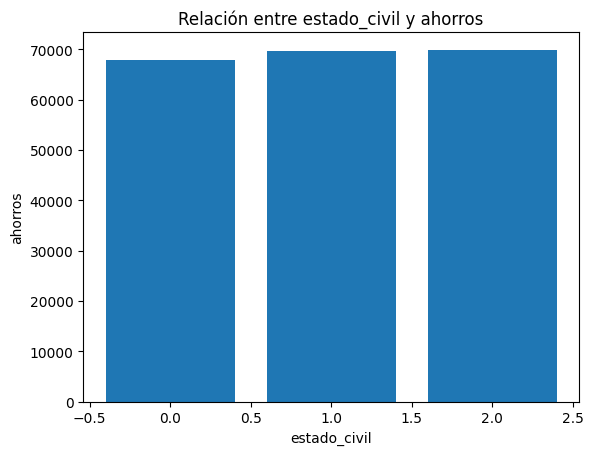

In [20]:
# Gráfica con los datos del DataFrame data_credito, para ello utilice un variable independiente en el eje X y una variable dependiente para el eje Y (utilice la gráfica que considere más apropiada para presentar los datos)
plt.bar(data_credito['estado_civil'], data_credito['ahorros'])
plt.title('Relación entre estado_civil y ahorros')
plt.xlabel('estado_civil')
plt.ylabel('ahorros')
plt.show()

Argumentos

- Los solteros tienen, en promedio, más ahorros que los casados y los divorciados.

- Los divorciados tienen, en promedio, menos ahorros que los solteros y los casados.

- No hay una relación clara entre el estado civil y los ahorros.

Ejercicio 2: Clima

In [12]:
### Cargamos el archivo clima.csv en un DataFrame denominado data_clima
data_clima = pd.read_csv("clima.csv", delimiter=";")
data_clima

,clima,temperatura,jugar
0,soleado,caliente,no
1,soleado,caliente,si
2,nublado,caliente,si
3,lluvioso,templado,si
4,luvioso,frio,no
5,lluvioso,frio,no
6,nublado,frio,si
7,soleado,templado,no
8,soleado,frio,si
9,lluvioso,templado,si


In [13]:
### Reemplazamos todos los valores de ‘luvioso’ a ‘lluvioso’ de la columna clima
data_clima['clima'] = data_clima['clima'].replace('luvioso', 'lluvioso')

### Reemplazar valores según la especificación dada
mapeo_clima = {'soleado': 0, 'nublado': 1, 'lluvioso': 2}
data_clima['clima'] = data_clima['clima'].map(mapeo_clima)

mapeo_temperatura = {'frio': 0, 'templado': 1, 'caliente': 2}
data_clima['temperatura'] = data_clima['temperatura'].map(mapeo_temperatura)

mapeo_jugar = {'no': 0, 'si': 1}
data_clima['jugar'] = data_clima['jugar'].map(mapeo_jugar)

In [14]:
print(mapeo_clima)
print(mapeo_temperatura)
print(mapeo_jugar)


{'soleado': 0, 'nublado': 1, 'lluvioso': 2}
{'frio': 0, 'templado': 1, 'caliente': 2}
{'no': 0, 'si': 1}


In [15]:
### Calculamos para cada columna: sumatoria, promedio y desviación estándar (utilice numpy)
resultados = {
    'sumatoria': data_clima.apply(np.sum),
    'promedio': data_clima.apply(np.mean),
    'desviacion_estandar': data_clima.apply(np.std)
}

# Mostrar los resultados
for columna, valores in resultados.items():
    print(f"\n{columna.capitalize()}:")
    print(valores)


Sumatoria:
clima          50
temperatura    49
jugar          31
dtype: int64

Promedio:
clima          1.020408
temperatura    1.000000
jugar          0.632653
dtype: float64

Desviacion_estandar:
clima          0.844908
temperatura    0.782461
jugar          0.482082
dtype: float64


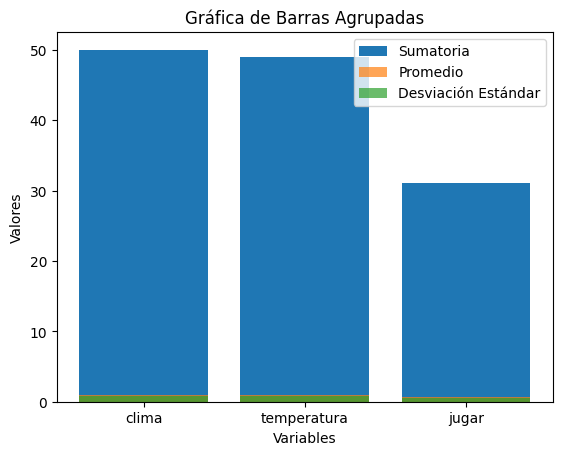

In [16]:
### Gráfica de barras agrupadas de las variables clima, temperatura y jugar versus los valores obtenidos en la sumatoria, promedio y desviación estándar del item anterior
indices = resultados['sumatoria'].index

plt.bar(indices, resultados['sumatoria'], label='Sumatoria')
plt.bar(indices, resultados['promedio'], label='Promedio', alpha=0.7)
plt.bar(indices, resultados['desviacion_estandar'], label='Desviación Estándar', alpha=0.7)

plt.xlabel('Variables')
plt.ylabel('Valores')
plt.title('Gráfica de Barras Agrupadas')
plt.legend()
plt.show()

In [17]:
### Argumente que observa en la gráfica a partir de los elementos calculados (sumatoria, promedio y desviación estándar)
data_clima

,clima,temperatura,jugar
0,0,2,0
1,0,2,1
2,1,2,1
3,2,1,1
4,2,0,0
5,2,0,0
6,1,0,1
7,0,1,0
8,0,0,1
9,2,1,1


Argumentos:

* Hay más jugadores que prefieren jugar en climas cálidos y temperaturas templadas.

* Se puede decir que existen más jugadores que prefieren jugar al aire libre.

* En la gráfica hay un aumento de concentración de jugadores en el clima cálido y la temperatura templada, con menos variabilidad en la cantidad de jugadores en diferentes variables.

* Podemos espeficicar un crecimiento de variabilidad en la cantidad de jugadores que juegan al aire libre en diferentes variables.
